### Step1 Importing important libraries and modules

In [309]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [310]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### Step2 EDA

In [311]:
# Read the dataset
L1 = pd.read_csv(r"C:\Users\shubham.jadhav16\Downloads\updg\Lead Scoring Assignment\leads.csv")


In [312]:
L1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [313]:
#Checking the Shape of dataset
L1.shape

(9240, 37)

In [314]:
# Inspecting the different columns in the dataset
L1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [315]:
# Checking the summary of the dataset
L1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [316]:
# Checking the info to see the types of the feature variables and the null values present
L1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [317]:
# Checking the number of missing values in each column
L1.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Lead Origin                 

In [318]:
# we will eliminate the columns having more than 30% missing values or 3000 missing values
missing_values = L1.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0.3 * L1.shape[0]]
missing_values

Lead Quality                   4767
Asymmetrique Profile Index     4218
Asymmetrique Activity Score    4218
Asymmetrique Activity Index    4218
Asymmetrique Profile Score     4218
Tags                           3353
dtype: int64

In [319]:
# drop the columns having more than 30% missing values
L2 = L1.drop(missing_values.index, axis=1)
L2.shape

(9240, 31)

In [320]:
# drop country column as it has only one value and is of no use as such for analysis
L2 = L2.drop('Country', axis=1)
L2.shape

(9240, 30)

In [321]:
# Checking the percentage number of missing values in each column
missing_values = L2.isnull().sum().sort_values(ascending=False)

In [322]:
#Now checking the percentage of missing values in each column

round(100*(missing_values/len(L2.index)), 2)


Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Do Not Call                                       0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Search                                            0.00
X Educatio

In [323]:
#select categorical columns
categorical_columns = L2.select_dtypes(include=['object']).columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [324]:
# count values for all categorical columns
for i in categorical_columns:
    print(L2[i].value_counts())
    print()

Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
6d143c0e-abae-425f-a2c0-52c2946cbd45    1
8247051c-f838-4a41-b39c-1f0b44c3d5e6    1
b3455e2e-8236-478a-b1aa-666ad3381722    1
da8c5ce5-52b5-4a4e-bf75-e533d2aca52c    1
d2055a36-b268-43a0-beeb-9a715f6a660d    1
Name: count, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call    

In [325]:
categorical_columns_drop=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 'Get updates on DM Content', 
    'I agree to pay the amount through cheque']

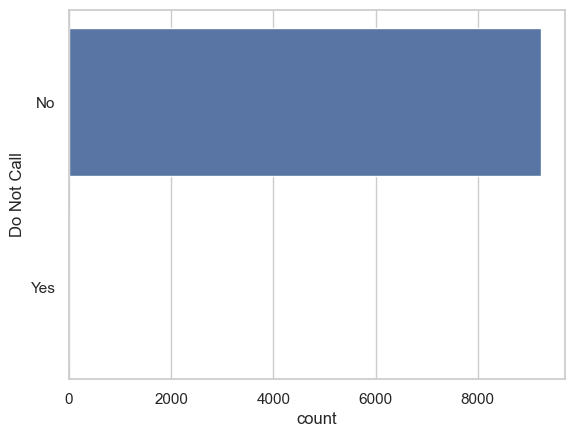

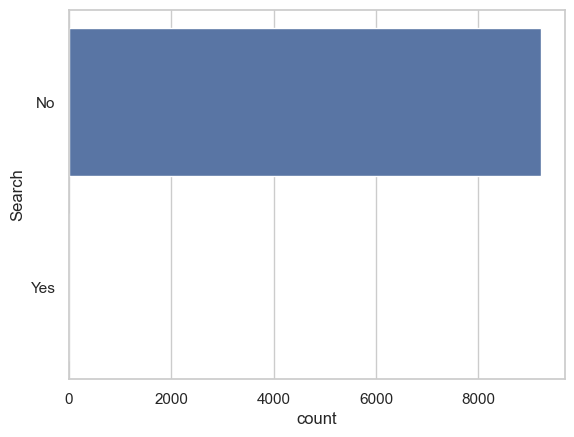

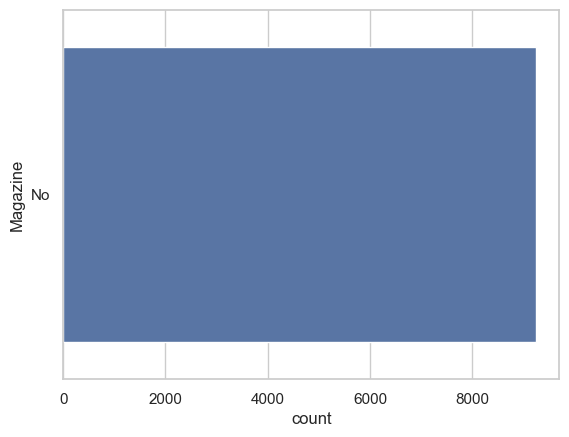

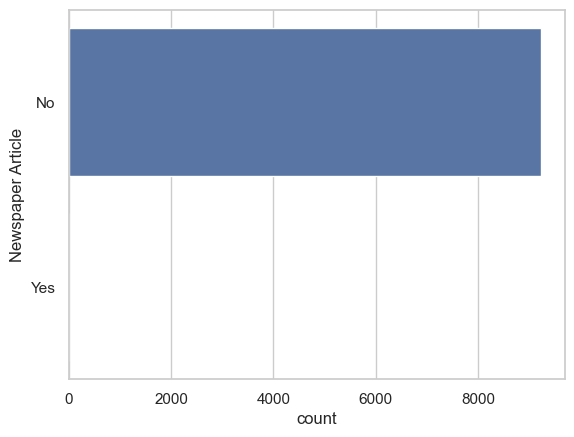

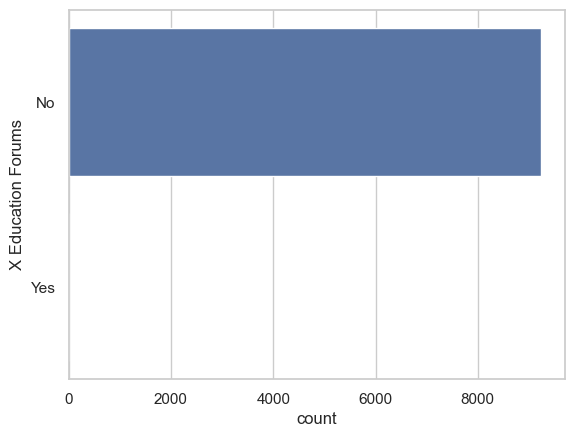

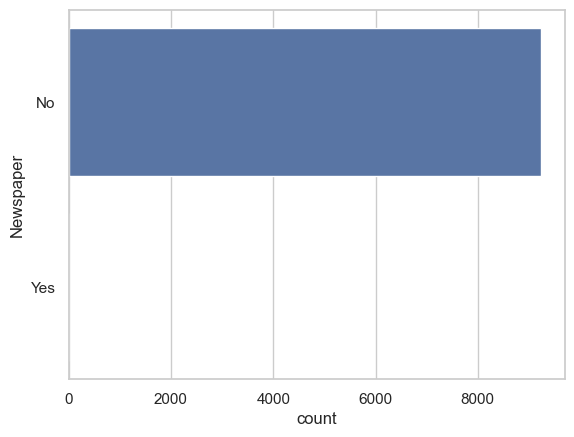

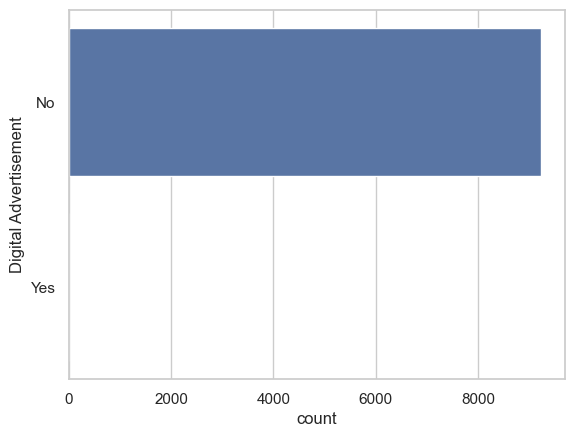

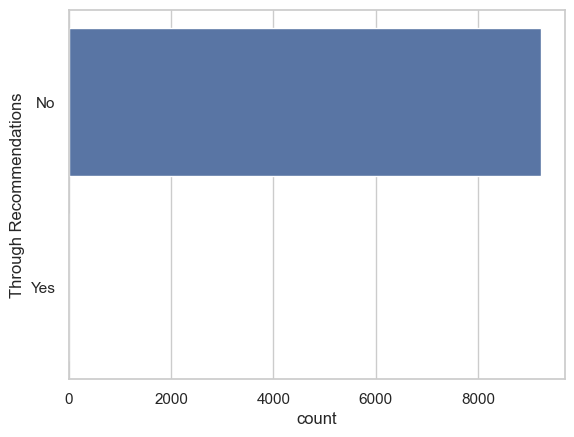

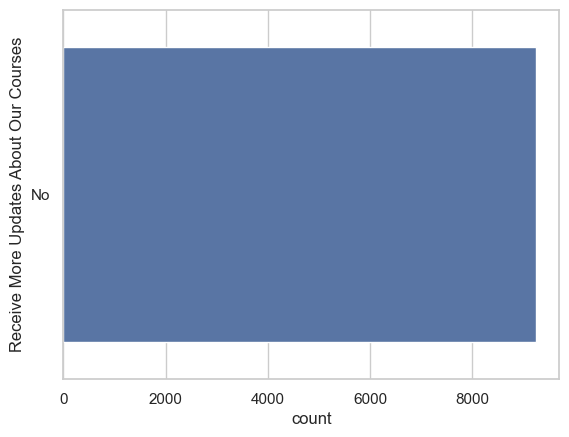

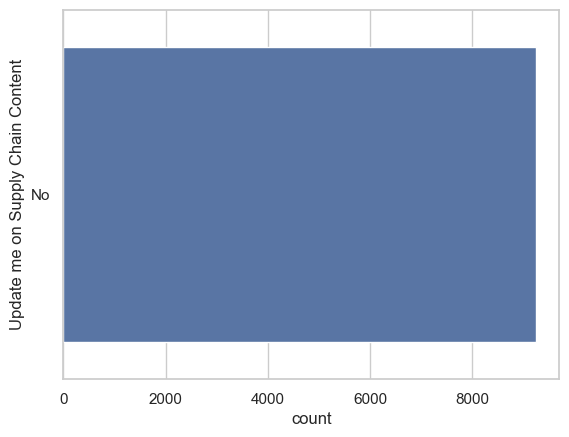

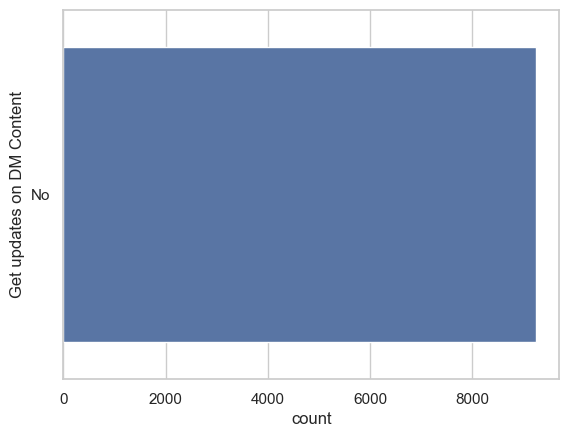

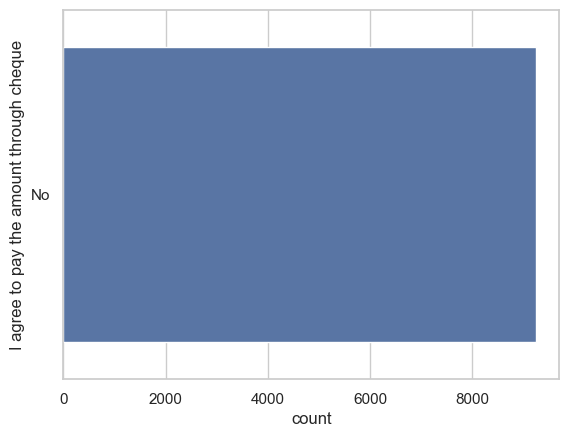

In [326]:
# create bar graph for categorical columns using categorical_columns list
for i in categorical_columns_drop:
    if i in L2.columns:
        sns.countplot(L2[i])
        plt.show()


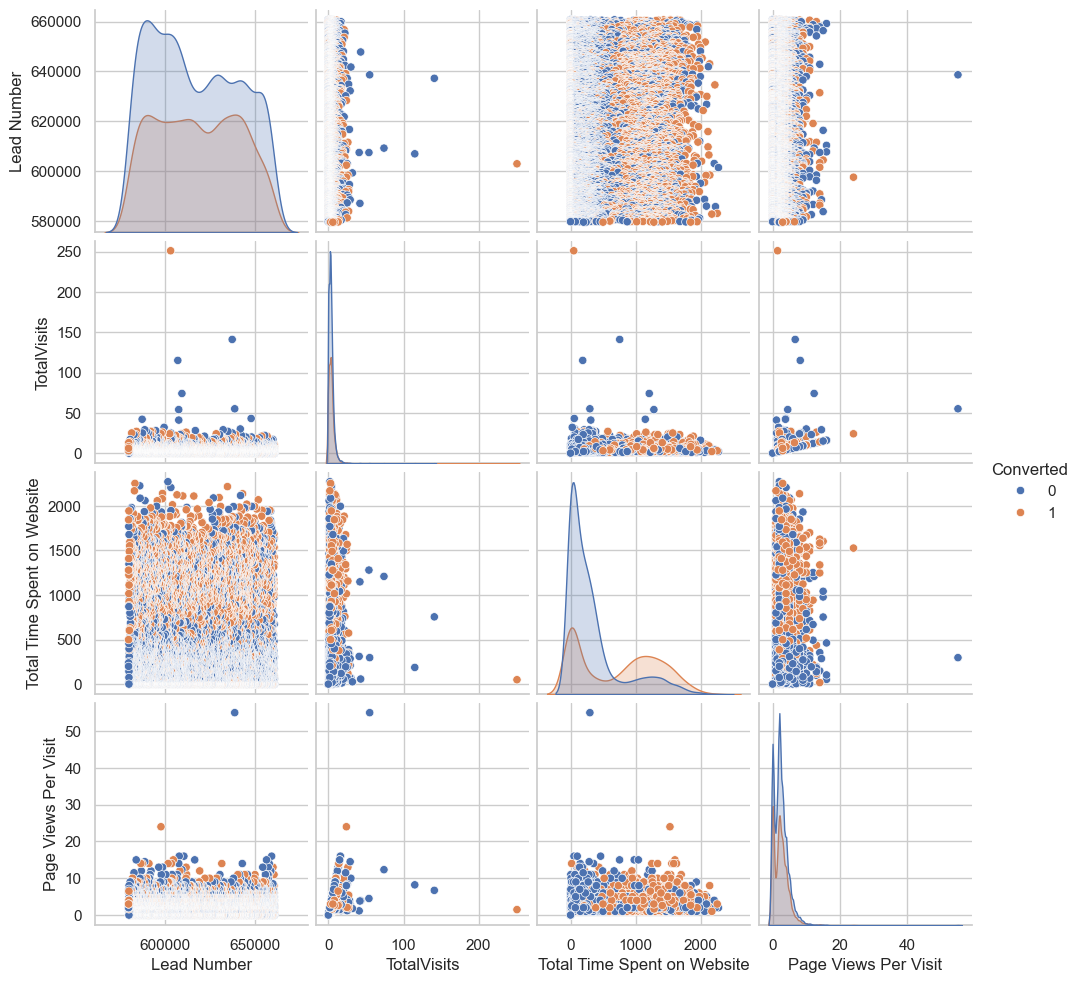

In [327]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(L2,diag_kind='kde',hue='Converted')
plt.show()

In [328]:
L2['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [329]:
lis=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 'Get updates on DM Content', 
    'I agree to pay the amount through cheque']

In [330]:
#L2[lis].value_counts()
for i in lis:
    print(L2[i].value_counts())
    print()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Search
No     9226
Yes      14
Name: count, dtype: int64

Magazine
No    9240
Name: count, dtype: int64

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

Get updates on DM Content
No    9240
Name: count, dtype: int64

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64



In [331]:
# dropping 'What matters most to you in choosing a course' since there are no significant values in them
L2.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [332]:
# dropping all the columns in the list lis since there are no significant values in them
L2.drop(lis, axis=1, inplace=True)


In [333]:
L2.shape

(9240, 17)

In [334]:
L2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          7802 non-null   obje

In [335]:
#we will not drop 'do not email', 'city' columns as we are not so sure about them

In [336]:
L2[['Lead Profile']].value_counts()


Lead Profile               
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [337]:
L2[['How did you hear about X Education']].value_counts()

How did you hear about X Education
Select                                5043
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
Name: count, dtype: int64

In [338]:
# Checking the percentage number of missing values in 'lead profile' and 'how did you hear about x education' columns 
# since they have large no of missing values as 'select'

L2= L2.drop(['Lead Profile', 'How did you hear about X Education'], axis=1)

In [339]:
L2.shape

(9240, 15)

In [340]:
L2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          7802 non-null   obje

In [341]:
# Checking the number of null values in each column
L2.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
City                                      1420
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Converted                                    0
Do Not Email                                 0
Lead Number                                  0
Lead Origin                                  0
Prospect ID                                  0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [342]:
# delete the rows from L2 where what is your current occupation is null
#L2 = L2[~pd.isnull(L2['What is your current occupation'])]
L2=L2[~L2['What is your current occupation'].isnull()]

In [343]:
L2.shape

(6550, 15)

In [344]:
# Checking the number of null values in each column
L2.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Prospect ID                                 0
Converted                                   0
Do Not Email                                0
Lead Number                                 0
Total Time Spent on Website                 0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [345]:
# drop rwos with null values in order to make data completely free of null values
#L2 = L2.dropna()
L2=L2[~L2['TotalVisits'].isnull()]

In [346]:
L2.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
Prospect ID                                0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
City                                       0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [347]:
L2=L2[~L2['Lead Source'].isnull()]

In [348]:
L2.shape

(6391, 15)

In [349]:
L2.isnull().sum().sort_values(ascending=False)

Specialization                            18
Lead Number                                0
Prospect ID                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
Lead Origin                                0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
City                                       0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [350]:
L2=L2[~L2['Specialization'].isnull()]

In [351]:
L2.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [352]:
#percentage of remaining rows out of total rows
round(100*(len(L2.index)/9240), 2)

68.97

In [353]:
L2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


In [354]:
# we will drop 'prospect id' and 'lead number' as it is of no use for analysis
L2 = L2.drop(['Prospect ID', 'Lead Number'], axis=1)

In [355]:
L2.shape

(6373, 13)

In [356]:
L2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


#### EDA is cpmpleted and we will now proceed with dummy variable creation

### Step3 Dummy Variable & Scaling

In [357]:
L3=L2

In [358]:
# select columns where dtype is object
categorical_columns = L3.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [359]:
# create dummy variables for categorical columns except specialisation
dummy = pd.get_dummies(L3[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'City', 'A free copy of Mastering The Interview']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [360]:
L3=pd.concat([L3, dummy], axis=1)
L3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [361]:
dummy_spl = pd.get_dummies(L3['Specialization'],prefix='Specialization')
#dummy_spl = pd.get_dummies(L3['Specialization'],drop_first=True)
dummy_spl.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [362]:
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
dummy_spl.head()


,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [363]:
L3 = pd.concat([L3, dummy_spl], axis = 1)

In [364]:
L3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Fa

In [365]:
#let's drop categorical_columns as we have created dummy variables for them
L3 = L3.drop(categorical_columns, axis=1)

In [366]:
L3.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [367]:
#Train test split with 70-30 ratio and random state 100
X = L3.drop(['Converted'], axis=1)
y = L3['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [368]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [369]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [370]:
# scalling the features
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,Fals

In [371]:
# scalling the features
scaler = MinMaxScaler()

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6122,0.094595,0.029294,0.127273,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9202,0.054054,0.420328,0.072727,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6570,0.040541,0.382157,0.054545,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2668,0.108108,0.398580,0.072727,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,T

In [372]:
#check correlation for multicolinearity
corr = L3.corr()
corr

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.148451,-0.138834,-0.134838,-0.033557,0.018407,-0.022391,0.018407,-0.036322,0.041575,-0.164168,-0.087121,0.285854,-0.021383,-0.032757,-0.011583,-0.012059,0.039068,0.011575,-0.034491,-0.259722,0.304859,-0.003641,0.025847,-0.003004,-0.007896,0.025182,-0.018984,-0.094833,0.036229,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.005896,-0.180458,0.078163,-0.003946,-0.004031,-0.097011,-0.004116,0.003414,0.028900,-0.074517,-0.040748,-0.013791,0.001319,0.011982,0.006584,0.007614,0.020031,-0.076145,0.210159,-0.039886,0.013528,0.001193,0.022964,0.000933,-0.008788,0.032481,-0.030920,0.024928,-0.016292,0.043860,0.022056,0.038783,-0.246937,0.066954,0.006817,0.186583,0.042269,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,0.032934,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,-0.016774,-0.320143,0.078956,-0.009090,-0.003927,-0.214864,0.017643,0.000557,0.014377,-0.119563,-0.012549,-0.005124,-0.054778,-0.024604,-0.041186,-0.034663,0.012137,0.006273,0.014817,0.005332,0.025174,-0.117193,0.028652,0.074763,-0.006941,-0.010034,-0.007779,-0.008824,0.004464,0.031702,-0.032170,-0.063398,0.082949,0.048123,0.068958,0.036898,-0.269044,0.059104,0.016544,0.154256,0.027925,0.051841,0.003934,-0.004325,0.060133,0.021332,0.026204,0.038074,0.025526,0.011056,0.052437,0.043356,0.050860,0.

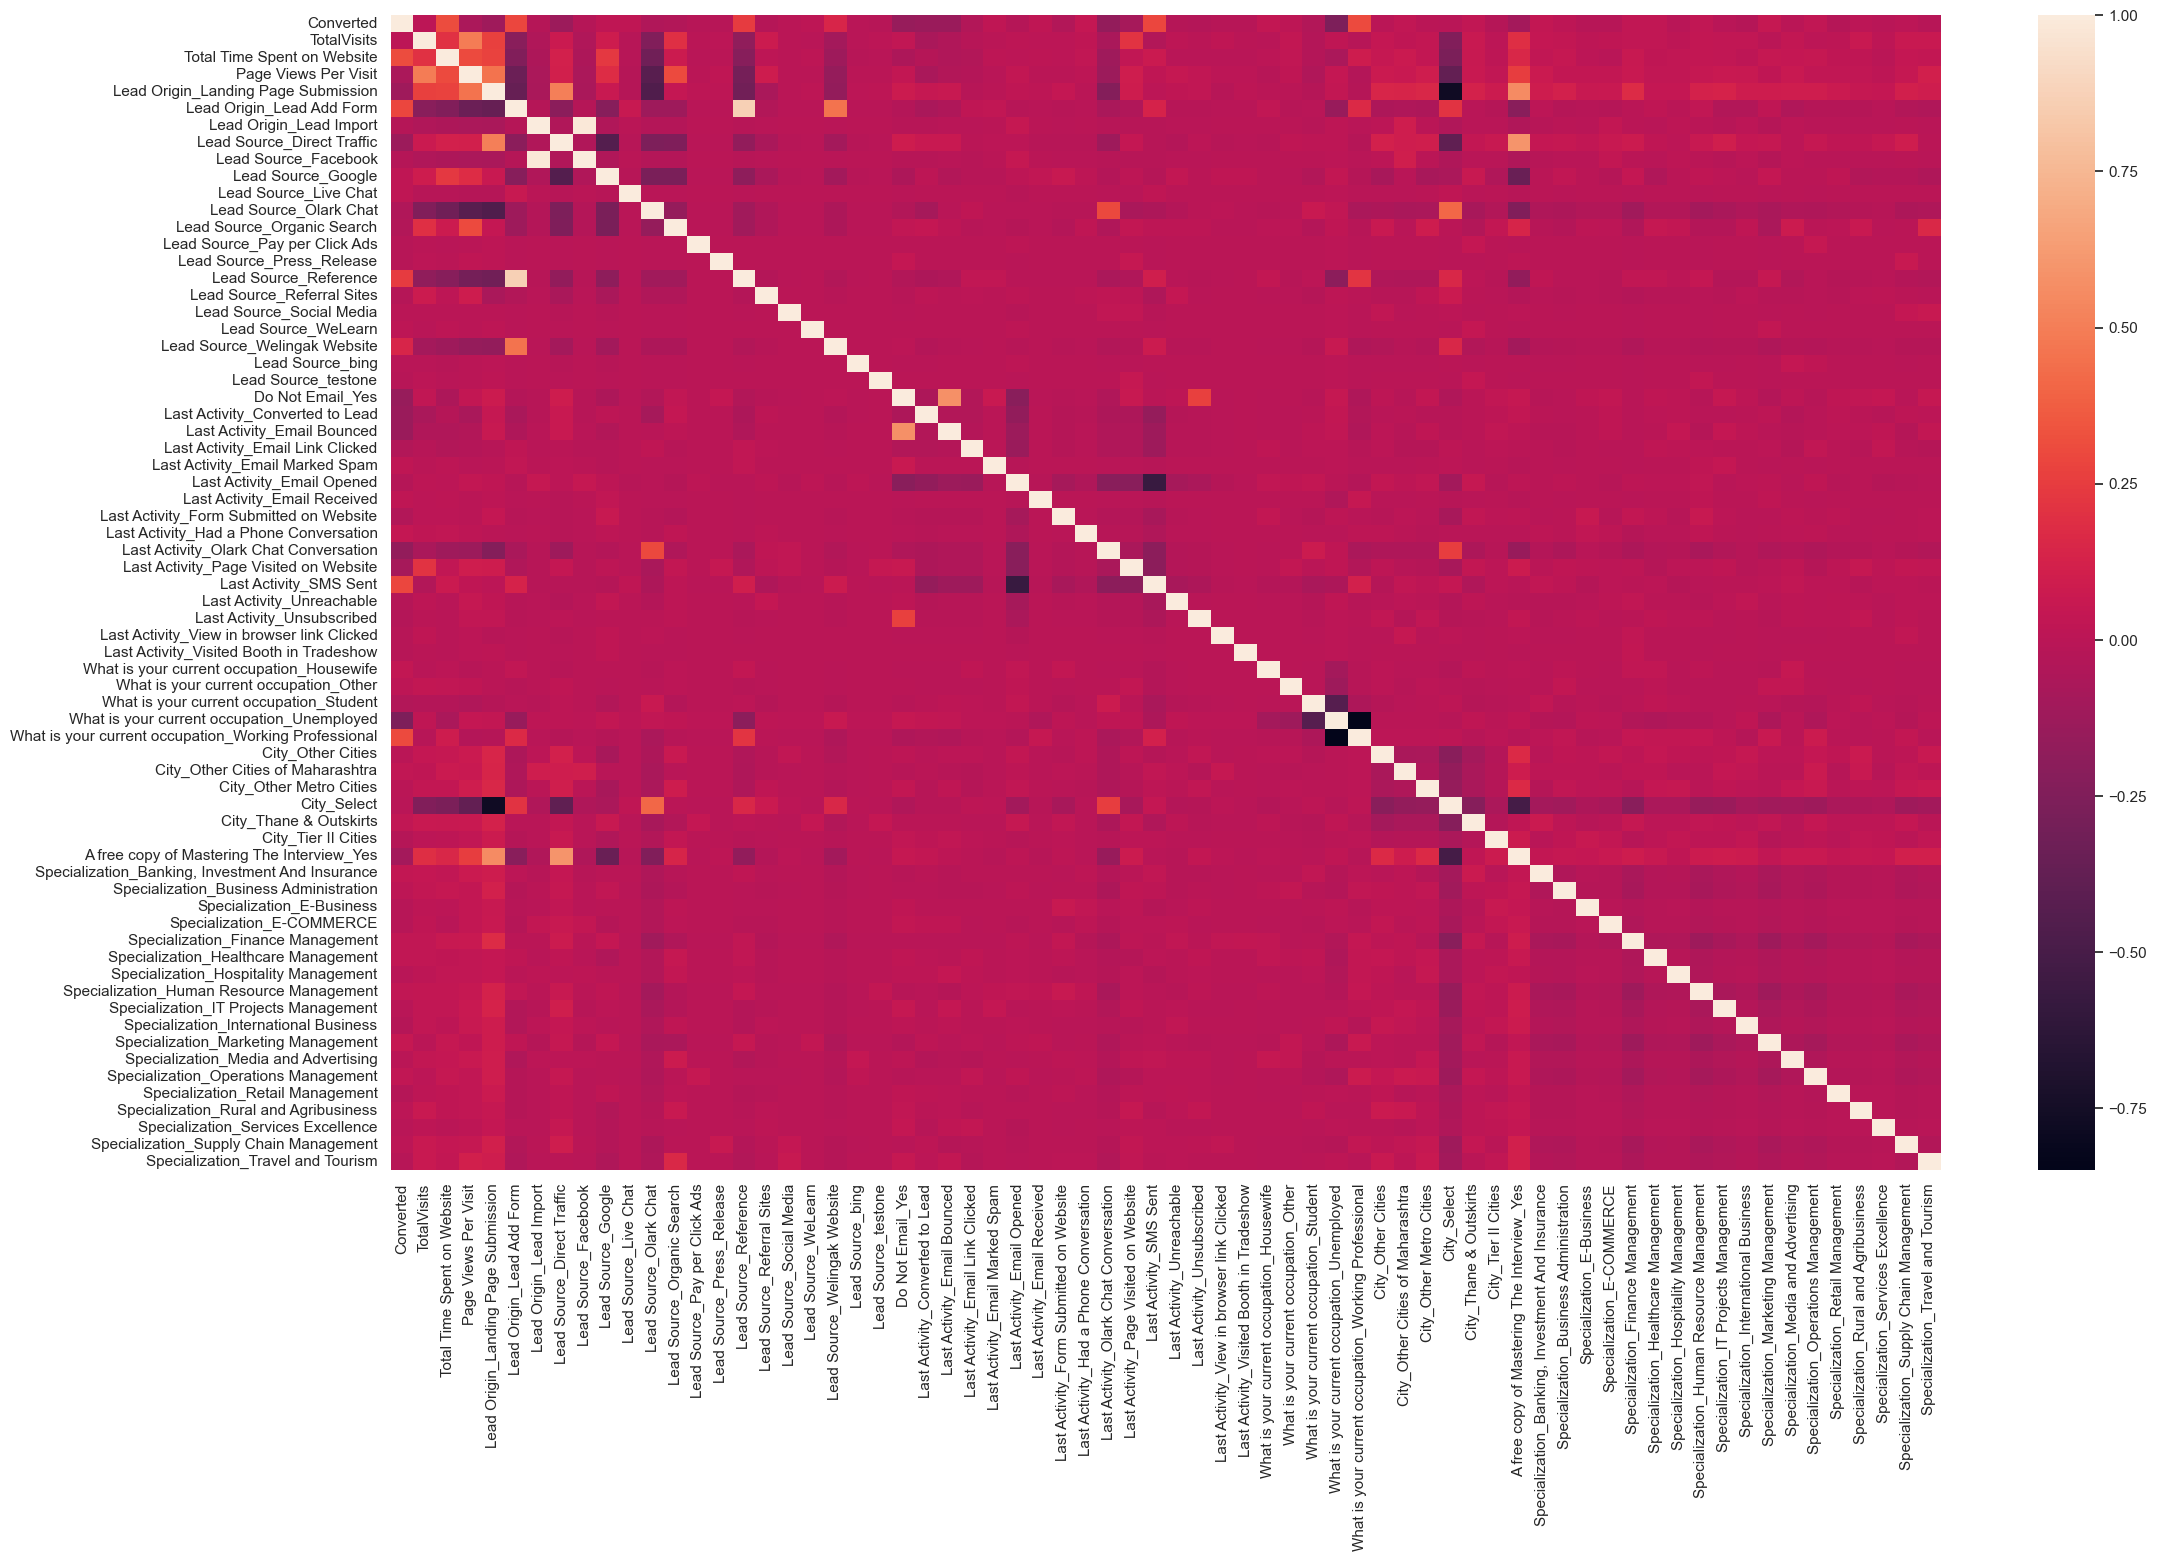

In [373]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(L3.corr())
plt.show()

#### Dummy variable is created and data is scaled according to the requirement

### Step4 Model Building

In [374]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [375]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [376]:
# 15 features have been selected by RFE based on ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.True_, np.int64(1)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(9)),
 ('Lead Origin_Landing Page Submission', np.True_, np.int64(1)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(13)),
 ('Lead Source_Direct Traffic', np.False_, np.int64(10)),
 ('Lead Source_Facebook', np.False_, np.int64(18)),
 ('Lead Source_Google', np.False_, np.int64(21)),
 ('Lead Source_Live Chat', np.False_, np.int64(35)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(19)),
 ('Lead Source_Pay per Click Ads', np.False_, np.int64(38)),
 ('Lead Source_Press_Release', np.False_, np.int64(46)),
 ('Lead Source_Reference', np.False_, np.int64(3)),
 ('Lead Source_Referral Sites', np.False_, np.int64(20)),
 ('Lead Source_Social Media', np.False_, np.int64(52)),
 ('Lead Source_WeLearn', np.False_, np.int64(34)),
 ('Lead Source_Wel

In [377]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select'],
      dtype='object')

In [378]:
X_train1 = X_train
X_train = X_train[col]
X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Select
8003,0.015936,0.029489,True,False,False,False,False,False,False,True,False,False,True,False,False
218,0.015936,0.082306,True,False,False,False,False,False,False,False,False,False,True,False,False
4171,0.023904,0.034331,True,False,False,False,False,False,False,False,False,False,True,False,False
4037,0.000000,0.000000,False,False,True,False,False,False,False,False,False,False,True,False,True
3660,0.000000,0.000000,False,True,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,False,True,False,False,False,False,False,True,False,False,True,False,True
100,0.027888,0.718750,False,False,False,False,False,False,False,False,False,False,True,False,True
5877,0.011952,0.752201,True,False,False,False,False,False,False,True,False,False,True,False,False
8658,0.015936,0.187060,True,False,False,False,False,False,False,False,False,False,True,False,False


In [379]:
X_train1

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.12500,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.25000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.37500,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.00000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.00000,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,

#### Model1

In [380]:
# Fit a logistic Regression model on X_train and y_train
# Ensure all columns are of type float
X_train = X_train.astype(float) 
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.8
Date:                Tue, 22 Oct 2024   Deviance:                       4059.6
Time:                        22:12:38   Pearson chi2:                 5.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3781
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0100      0.602      0.017      0.987      -1.170       1.190
TotalVisits                                             10.7492      2.667      4.031      0.000       5.522      15.976
Total Time Spent on Website                              4.3632      0.186     23.417      0.000       3.998       4.728
Lead Origin_Landing Page Submission                     -1.1561      0.146     -7.940      0.000      -1.441      -0.871
Lead Origin_Lead Add Form                                3.6498      0.269     13.559      0.000       3.122       4.177
Lead Source_Olark Chat                                   1.4001      0.144      9.711      0.000       1.118       1.683
Lead Source_Welingak Website                             2.5610      1.039      2.466      0.014       0.526       4.596
Do Not Email_Yes                                        -1.5210      0.196     -7.778      0.000      -1.904      -1.138
Last Activity_Had a Phone Conversation                   2.6957      0.798      3.378      0.001       1.132       4.260
Last Activity_Olark Chat Conversation                   -0.9826      0.188     -5.222      0.000      -1.351      -0.614
Last Activity_SMS Sent                                   1.1479      0.085     13.581      0.000       0.982       1.314
What is your current occupation_Housewife               21.6858   1.42e+04      0.002      0.999   -2.78e+04    2.78e+04
What is your current occupation_Student                 -0.9406      0.625     -1.505      0.132      -2.166       0.284
What is your current occupation_Unemployed              -1.1916      0.585     -2.037      0.042      -2.338      -0.045
What is your current occupation_Working Professional     1.4042      0.614      2.285      0.022       0.200       2.608
City_Select                                             -1.0877      0.143     -7.614      0.000      -1.368      -0.808
========================================================================================================================
"""

In [381]:
# We can see 'What is your current occupation_Housewife' has high p-value, so we will drop it but let's check VIF first

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,12.42
2,Lead Origin_Landing Page Submission,7.27
14,City_Select,3.93
13,What is your current occupation_Working Professional,2.72
1,Total Time Spent on Website,2.40
3,Lead Origin_Lead Add Form,2.09
4,Lead Source_Olark Chat,1.94
9,Last Activity_SMS Sent,1.66
0,TotalVisits,1.63
11,What is your current occupation_Student,1.40


In [382]:
# drop 'Lead Origin_Landing Page Submission' & 'What is your current occupation_Unemployed' coluns as they have high vif
#X_train = X_train.drop(['Lead Origin_Landing Page Submission', 'What is your current occupation_Unemployed'], axis=1)
X_train = X_train.drop(['What is your current occupation_Unemployed'], axis=1)

In [383]:
# dropping in testdataset as well
X_test=X_test.drop(['What is your current occupation_Unemployed'], axis=1)

#### Model2

In [384]:
X_train = X_train.astype(float) 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.0
Date:                Tue, 22 Oct 2024   Deviance:                       4064.1
Time:                        22:12:40   Pearson chi2:                 5.13e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3775
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1742      0.157     -7.494      0.000      -1.481      -0.867
TotalVisits                                             11.0614      2.685      4.120      0.000       5.800      16.323
Total Time Spent on Website                              4.3688      0.186     23.456      0.000       4.004       4.734
Lead Origin_Landing Page Submission                     -1.1613      0.146     -7.978      0.000      -1.447      -0.876
Lead Origin_Lead Add Form                                3.6563      0.269     13.583      0.000       3.129       4.184
Lead Source_Olark Chat                                   1.4020      0.144      9.723      0.000       1.119       1.685
Lead Source_Welingak Website                             2.5540      1.038      2.459      0.014       0.519       4.589
Do Not Email_Yes                                        -1.5171      0.195     -7.776      0.000      -1.900      -1.135
Last Activity_Had a Phone Conversation                   2.6839      0.798      3.362      0.001       1.119       4.248
Last Activity_Olark Chat Conversation                   -0.9911      0.188     -5.267      0.000      -1.360      -0.622
Last Activity_SMS Sent                                   1.1389      0.084     13.496      0.000       0.973       1.304
What is your current occupation_Housewife               22.8696   1.42e+04      0.002      0.999   -2.78e+04    2.78e+04
What is your current occupation_Student                  0.2445      0.227      1.075      0.282      -0.201       0.690
What is your current occupation_Working Professional     2.5893      0.197     13.138      0.000       2.203       2.976
City_Select                                             -1.0913      0.143     -7.641      0.000      -1.371      -0.811
========================================================================================================================
"""

In [385]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.39
13,City_Select,2.10
1,Total Time Spent on Website,2.06
9,Last Activity_SMS Sent,1.65
3,Lead Origin_Lead Add Form,1.62
0,TotalVisits,1.56
4,Lead Source_Olark Chat,1.56
5,Lead Source_Welingak Website,1.34
8,Last Activity_Olark Chat Conversation,1.23
12,What is your current occupation_Working Professional,1.21


In [386]:
#drop 'What is your current occupation_Housewife' as it has high p value
X_train = X_train.drop(['What is your current occupation_Housewife'], axis=1)

In [387]:
# dropping in testdataset as well
X_test=X_test.drop(['What is your current occupation_Housewife'], axis=1)

#### Model3

In [388]:
X_train = X_train.astype(float) 
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.3
Date:                Tue, 22 Oct 2024   Deviance:                       4076.6
Time:                        22:12:43   Pearson chi2:                 5.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1630      0.156     -7.436      0.000      -1.470      -0.856
TotalVisits                                             10.8709      2.669      4.072      0.000       5.639      16.103
Total Time Spent on Website                              4.3661      0.186     23.476      0.000       4.002       4.731
Lead Origin_Landing Page Submission                     -1.1557      0.145     -7.953      0.000      -1.440      -0.871
Lead Origin_Lead Add Form                                3.6614      0.269     13.611      0.000       3.134       4.189
Lead Source_Olark Chat                                   1.3984      0.144      9.708      0.000       1.116       1.681
Lead Source_Welingak Website                             2.5463      1.038      2.452      0.014       0.511       4.582
Do Not Email_Yes                                        -1.5217      0.195     -7.807      0.000      -1.904      -1.140
Last Activity_Had a Phone Conversation                   2.6752      0.798      3.352      0.001       1.111       4.239
Last Activity_Olark Chat Conversation                   -0.9952      0.188     -5.290      0.000      -1.364      -0.626
Last Activity_SMS Sent                                   1.1298      0.084     13.406      0.000       0.965       1.295
What is your current occupation_Student                  0.2375      0.227      1.044      0.296      -0.208       0.683
What is your current occupation_Working Professional     2.5822      0.197     13.106      0.000       2.196       2.968
City_Select                                             -1.0950      0.143     -7.676      0.000      -1.375      -0.815
========================================================================================================================
"""

In [389]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.39
12,City_Select,2.10
1,Total Time Spent on Website,2.05
9,Last Activity_SMS Sent,1.65
3,Lead Origin_Lead Add Form,1.62
4,Lead Source_Olark Chat,1.56
0,TotalVisits,1.56
5,Lead Source_Welingak Website,1.34
8,Last Activity_Olark Chat Conversation,1.23
11,What is your current occupation_Working Professional,1.21


In [390]:
# drop 'What is your current occupation_Student' column as it has high p value
X_train = X_train.drop(['What is your current occupation_Student'], axis=1)

In [391]:
# dropping in testdataset as well
X_test=X_test.drop(['What is your current occupation_Student'], axis=1)

#### Model4

In [392]:
X_train = X_train.astype(float) 
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.8
Date:                Tue, 22 Oct 2024   Deviance:                       4077.6
Time:                        22:12:45   Pearson chi2:                 5.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1562      0.156     -7.405      0.000      -1.462      -0.850
TotalVisits                                             10.8251      2.666      4.061      0.000       5.600      16.050
Total Time Spent on Website                              4.3672      0.186     23.481      0.000       4.003       4.732
Lead Origin_Landing Page Submission                     -1.1530      0.145     -7.941      0.000      -1.438      -0.868
Lead Origin_Lead Add Form                                3.6638      0.269     13.623      0.000       3.137       4.191
Lead Source_Olark Chat                                   1.4047      0.144      9.760      0.000       1.123       1.687
Lead Source_Welingak Website                             2.5422      1.038      2.448      0.014       0.507       4.578
Do Not Email_Yes                                        -1.5251      0.195     -7.824      0.000      -1.907      -1.143
Last Activity_Had a Phone Conversation                   2.6679      0.798      3.344      0.001       1.104       4.232
Last Activity_Olark Chat Conversation                   -0.9863      0.188     -5.248      0.000      -1.355      -0.618
Last Activity_SMS Sent                                   1.1253      0.084     13.378      0.000       0.960       1.290
What is your current occupation_Working Professional     2.5749      0.197     13.080      0.000       2.189       2.961
City_Select                                             -1.0961      0.143     -7.688      0.000      -1.376      -0.817
========================================================================================================================
"""

In [393]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.37
11,City_Select,2.10
1,Total Time Spent on Website,2.05
9,Last Activity_SMS Sent,1.65
3,Lead Origin_Lead Add Form,1.62
0,TotalVisits,1.56
4,Lead Source_Olark Chat,1.56
5,Lead Source_Welingak Website,1.34
8,Last Activity_Olark Chat Conversation,1.23
10,What is your current occupation_Working Professional,1.21


#### High P-value & High VIF value features are eliminated by using model building

### Step5 Predict using built Model

In [394]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.292615
218     0.144635
4171    0.130043
4037    0.299928
3660    0.974240
207     0.206101
2044    0.189543
6411    0.953199
6498    0.063513
2085    0.981178
dtype: float64

In [395]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29261514, 0.1446352 , 0.13004336, 0.29992831, 0.97424021,
       0.20610106, 0.18954256, 0.95319895, 0.06351332, 0.98117752])

In [396]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.292615
1,0,0.144635
2,1,0.130043
3,1,0.299928
4,1,0.974240


In [397]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.292615,0
1,0,0.144635,0
2,1,0.130043,0
3,1,0.299928,0
4,1,0.974240,1


### Step6 Evaluate the built model

In [398]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1918  394]
 [ 523 1626]]


In [399]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7944407083613539


In [400]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [401]:
# Calculating the 'sensitivity'

TP/(TP+FN)

np.float64(0.7566309911586785)

In [402]:
# Calculating the 'specificity'

TN/(TN+FP)

np.float64(0.8295847750865052)

In [403]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [404]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

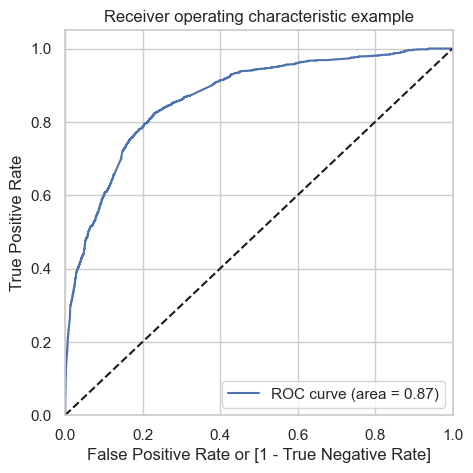

In [405]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Area under ROC curve is 0.87 which is a sign of a good model.

### Step7 Finding more optimal cutoff value by iterations.

In [406]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.292615,0,1,1,1,0,0,0,0,0,0,0
1,0,0.144635,0,1,1,0,0,0,0,0,0,0,0
2,1,0.130043,0,1,1,0,0,0,0,0,0,0,0
3,1,0.299928,0,1,1,1,0,0,0,0,0,0,0
4,1,0.974240,1,1,1,1,1,1,1,1,1,1,1


In [407]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.536203  0.995347  0.109429
0.2   0.2  0.720018  0.941833  0.513841
0.3   0.3  0.770903  0.872034  0.676903
0.4   0.4  0.794441  0.818520  0.772059
0.5   0.5  0.794441  0.756631  0.829585
0.6   0.6  0.764627  0.639367  0.881055
0.7   0.7  0.741314  0.556073  0.913495
0.8   0.8  0.711051  0.454165  0.949827
0.9   0.9  0.663753  0.322010  0.981401


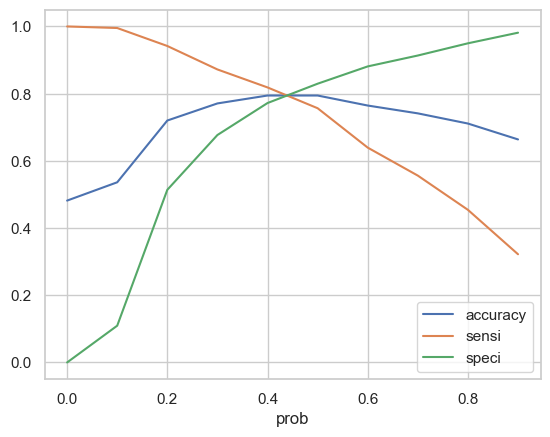

In [408]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As graph cuts each other through `0.4` to `0.5`, let's choose 0.43 as our optimal cutoff.

In [409]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.292615,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.144635,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.130043,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.299928,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.974240,1,1,1,1,1,1,1,1,1,1,1,1


In [410]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926473884779197

In [411]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 436, 1713]])

In [412]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [413]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

np.float64(0.7971149371800837)

In [414]:
# Calculating the 'Specificity'

TN/(TN+FP)

np.float64(0.7884948096885813)

### Step8 Making Predictions on the Test Set

In [415]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Other,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6122,0.094595,0.029294,0.127273,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9202,0.054054,0.420328,0.072727,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6570,0.040541,0.382157,0.054545,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2668,0.108108,0.398580,0.072727,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [416]:
# Selecting the columns in X_train for X_test as well

# Ensure X_test has the same columns as X_train after dropping specific columns
X_test = X_test[X_train.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,City_Select
4771,0.000000,0.000000,False,True,False,False,False,False,False,True,True,True
6122,0.094595,0.029294,True,False,False,False,False,False,False,False,False,False
9202,0.054054,0.420328,True,False,False,False,False,False,False,True,False,False
6570,0.040541,0.382157,True,False,False,False,True,False,False,True,False,False
2668,0.108108,0.398580,True,False,False,False,False,False,False,True,False,False


In [417]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [418]:
#Check if the train and test data set has equal number of columns or not
X_train.shape

(4461, 12)

In [419]:
# If test dataset has more columns than train dataset, then we will drop those columns
X_test.shape

(1912, 12)

In [420]:
X_test = X_test.astype(float)
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.994010
6122    0.239151
9202    0.775004
6570    0.354053
2668    0.849022
4233    0.790414
3368    0.758690
9091    0.689627
5972    0.319568
3631    0.855032
dtype: float64

In [421]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
4771,1,0.994010
6122,0,0.239151
9202,0,0.775004
6570,1,0.354053
2668,1,0.849022


In [422]:
# Make predictions on the test set using 0.45 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
4771,1,0.994010,1
6122,0,0.239151,0
9202,0,0.775004,1
6570,1,0.354053,0
2668,1,0.849022,1


In [423]:
# Let's check the overall accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.7625523012552301

In [424]:
confusion3 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion3

array([[689, 307],
       [147, 769]])

In [425]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [426]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

np.float64(0.8395196506550219)

In [427]:
# Calculating the 'specificity'
TN / float(TN+FP)

np.float64(0.6917670682730924)

In [428]:
y_test_pred_final1=y_test_pred_final

#### Extra rechecks

In [429]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final1[i]= y_test_pred_final1.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final1.head()

,Converted,Conversion_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4771,1,0.994010,1,1,1,1,1,1,1,1,1,1,1
6122,0,0.239151,0,1,1,1,0,0,0,0,0,0,0
9202,0,0.775004,1,1,1,1,1,1,1,1,1,0,0
6570,1,0.354053,0,1,1,1,1,0,0,0,0,0,0
2668,1,0.849022,1,1,1,1,1,1,1,1,1,1,0


In [430]:
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final1.Converted, y_test_pred_final1[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479079  1.000000  0.000000
0.1   0.1  0.524059  0.996725  0.089357
0.2   0.2  0.650628  0.966157  0.360442
0.3   0.3  0.723849  0.900655  0.561245
0.4   0.4  0.763075  0.859170  0.674699
0.5   0.5  0.774582  0.804585  0.746988
0.6   0.6  0.771444  0.711790  0.826305
0.7   0.7  0.769874  0.648472  0.881526
0.8   0.8  0.735879  0.533843  0.921687
0.9   0.9  0.684623  0.381004  0.963855


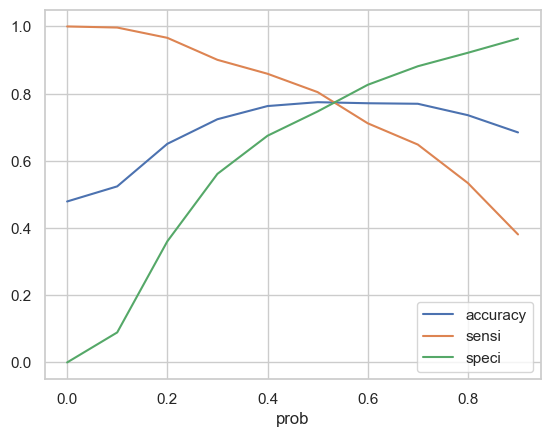

In [431]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Step9 Model using precision-Recall

In [432]:
# Let's checking the `accuracy` now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7944407083613539

In [433]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1918,  394],
       [ 523, 1626]])

In [434]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [435]:
# Calculating the 'precision'
TP / float(TP+FP)

np.float64(0.804950495049505)

In [436]:
# Calculating the 'Recall'
TP / float(TP+FN)

np.float64(0.7566309911586785)

In [437]:
y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

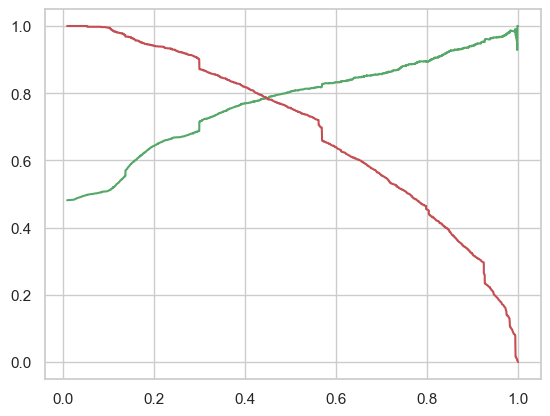

In [438]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [439]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.292615,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.144635,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.130043,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.299928,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.974240,1,1,1,1,1,1,1,1,1,1,1,1


In [440]:
# Let's checking the `accuracy` now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7937682134050661

In [441]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1842,  470],
       [ 450, 1699]])

In [442]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [443]:
# Calculating the 'precision'
TP / float(TP+FP)

np.float64(0.7833102812355924)

In [444]:
# Calculating the 'Recall'
TP / float(TP+FN)

np.float64(0.7906002791996277)

### Step10 Making Predictions on the Test Set

In [445]:
# Make predictions on the test set using 0.44 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4771,1,0.994010,1,1,1,1,1,1,1,1,1,1,1
6122,0,0.239151,0,1,1,1,0,0,0,0,0,0,0
9202,0,0.775004,1,1,1,1,1,1,1,1,1,0,0
6570,1,0.354053,0,1,1,1,1,0,0,0,0,0,0
2668,1,0.849022,1,1,1,1,1,1,1,1,1,1,0


In [446]:
# Let's check the overall accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.7656903765690377

In [447]:
confusion3 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion3

array([[698, 298],
       [150, 766]])

In [448]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [449]:
# Calculating the 'precision'
TP / float(TP+FP)

np.float64(0.7199248120300752)

In [450]:
# Calculating the 'Recall'
TP / float(TP+FN)

np.float64(0.8362445414847162)

#### Exrta recheck

In [451]:
y_test_pred_final.Converted, y_test_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob)

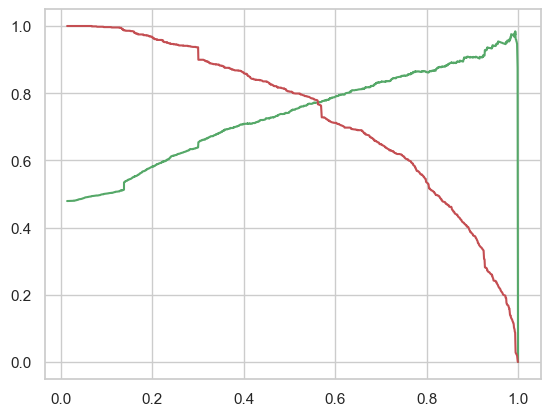

In [452]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()